In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

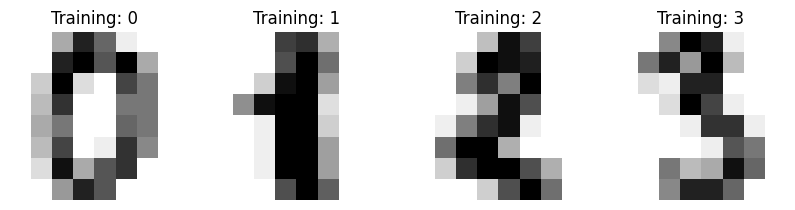

In [3]:
digits = load_digits()
data = digits['data']
targets = digits['target']
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
digits.images[0].shape

(8, 8)

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [6]:
from sklearn import svm,metrics,tree,neighbors,ensemble
from sklearn.naive_bayes import GaussianNB

models = [svm.SVC(gamma=0.001),tree.DecisionTreeClassifier(),neighbors.KNeighborsClassifier(10),GaussianNB()]
titles = ['SVM','Decision Tree','KNN','Navie Bayes']
svm_clf = svm.SVC(gamma=0.001)
dt_clf = tree.DecisionTreeClassifier()
knn_clf = neighbors.KNeighborsClassifier(10)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.3, shuffle=True
)

predicted = []
for model in models:
    model.fit(X_train, y_train)
    predicted.append(model.predict(X_test))

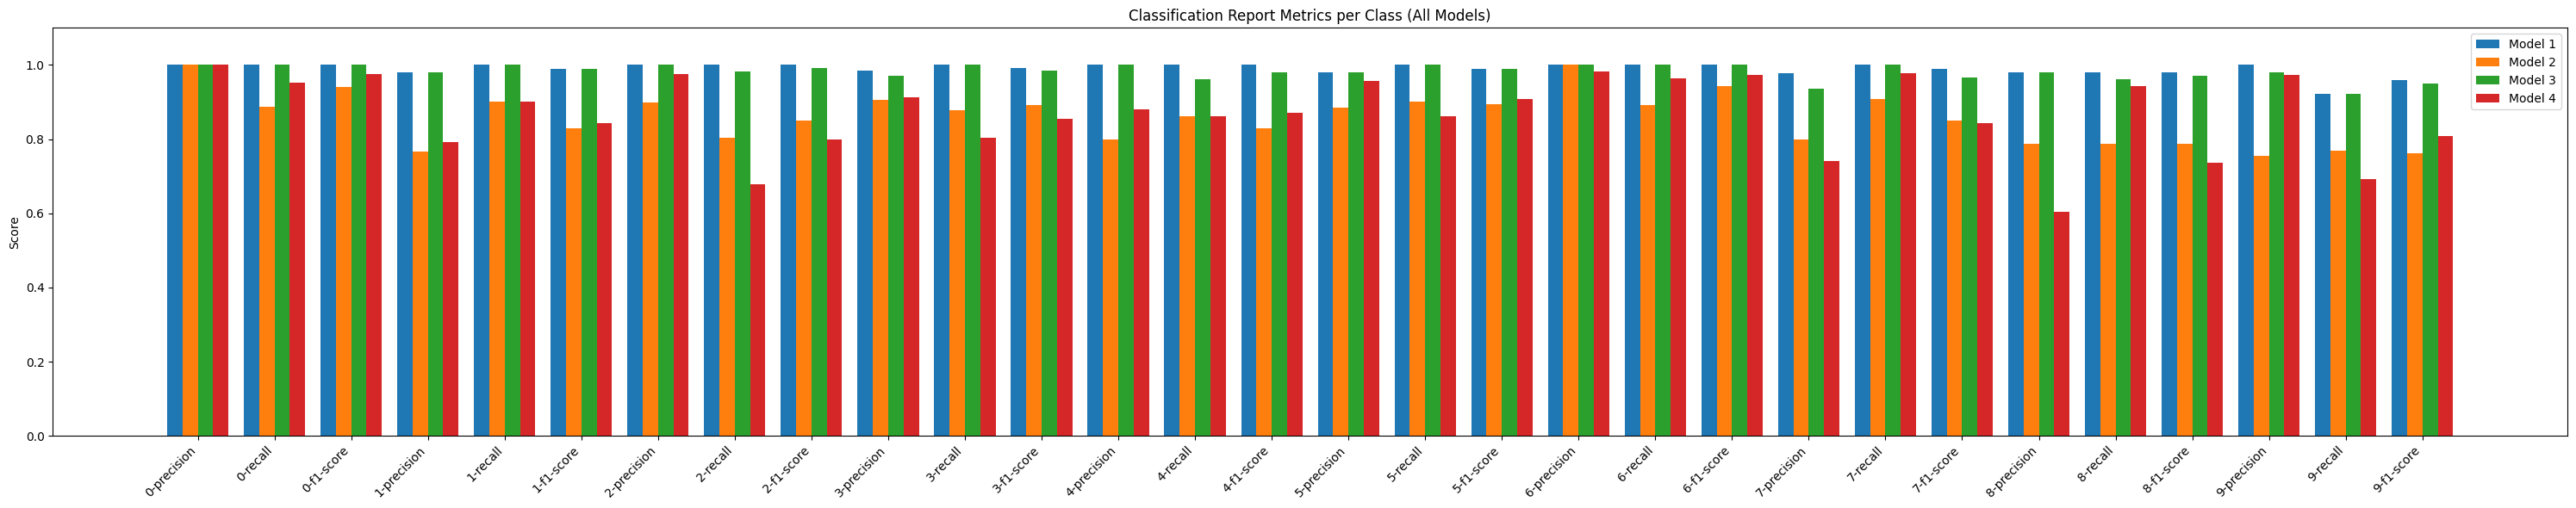

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        56
           3       0.99      1.00      0.99        66
           4       1.00      1.00      1.00        51
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        55
           7       0.98      1.00      0.99        44
           8       0.98      0.98      0.98        52
           9       1.00      0.92      0.96        52

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        62
           1 

In [8]:
import numpy as np
from sklearn.metrics import classification_report

model_names = [f"Model {i+1}" for i in range(len(models))]

# Step 1: Extract classification reports
reports = [classification_report(y_test, predicted[i], output_dict=True) for i in range(len(models))]

# Step 2: Collect class labels (ignore avg & accuracy)
class_labels = [label for label in reports[0].keys() if label not in ('accuracy', 'macro avg', 'weighted avg')]
metrics_names = ['precision', 'recall', 'f1-score']

# Step 3: Prepare data
x_labels = []
scores_by_model = [[] for _ in models]  # one list per model

for class_label in class_labels:
    for metric in metrics_names:
        x_labels.append(f"{class_label}-{metric}")
        for i, report in enumerate(reports):
            scores_by_model[i].append(report[class_label][metric])

# Step 4: Plot grouped bar chart
x = np.arange(len(x_labels))  # positions on X-axis
bar_width = 0.8 / len(models)  # space bars evenly

fig, ax = plt.subplots(figsize=(max(10, len(x_labels)), 6))

for i, scores in enumerate(scores_by_model):
    offset = i * bar_width
    ax.bar(x + offset, scores, width=bar_width, label=model_names[i])

ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_ylabel("Score")
ax.set_ylim(0, 1.1)
ax.set_title("Classification Report Metrics per Class (All Models)")
ax.legend()

plt.tight_layout()
plt.show()

for i,model in enumerate(models):
    print(
        f"Classification report for classifier {model}:\n"
        f"{metrics.classification_report(y_test, predicted[i])}\n"
    )

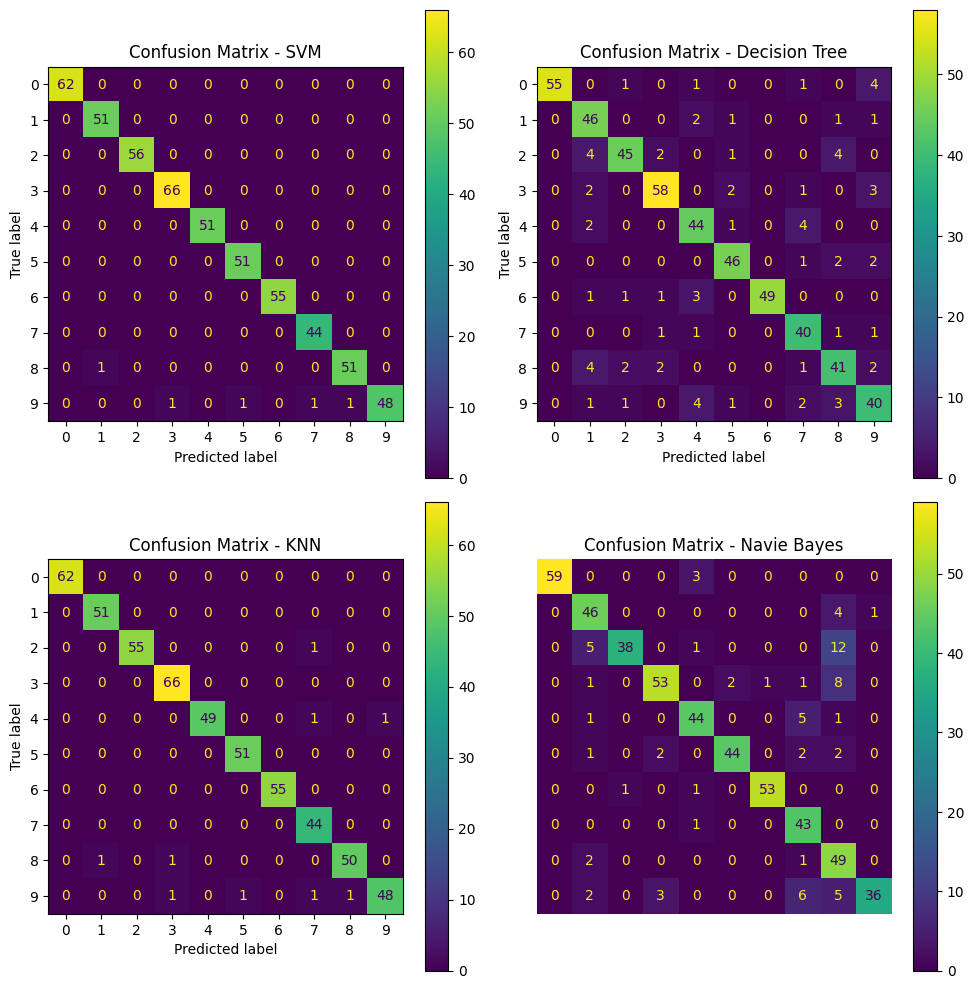

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i in range(4):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted[i], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {titles[i]}")

# Hide the unused subplot (the 4th one)
axes[3].axis('off')

plt.tight_layout()
plt.show()

SVM - Gave number : 5
Decision Tree - Gave number : 8
KNN - Gave number : 5
Navie Bayes - Gave number : 5


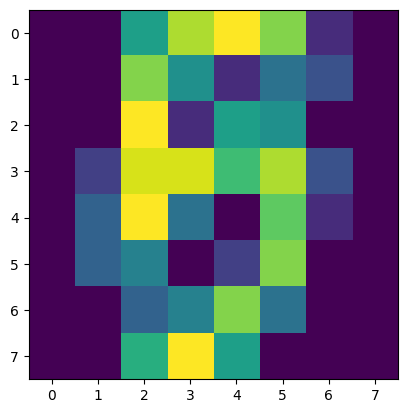

In [10]:
# Usage
idx = 10
plt.imshow(X_test[idx].reshape(8,8))
for i,model in enumerate(models):
    print(f"{titles[i]} - Gave number :",digits['target_names'][model.predict([X_test[idx]])[0]])